In [2]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import seaborn as sns
import pandas as pd

# 기본 데이터셋 목록 조회
sns.get_dataset_names()

df_titanic = sns.load_dataset('titanic')

df_titanic

# 데이터 분석 5단계
# 1. 문제 정의
# 2. 데이터 수집
# 3. 데이터 전처리 : 중복값/결측치 처리를 하고 분석하기 좋은 구조로 만든다.
# 4. 데이터 모델링 : 전처리가 끝난 데이터를 목적에 맞게 분류한다.(데이터 쪼개기)
# 5. 시각화 및 결론 도출

# 데이터 전처리 단계
# 1. 각 칼럼이 무엇을 의미하고 어떻게 데이터를 표현하는지, 결측값/중복값이 있는지 등등을 파악한다.
# 2. 결측값/중복값 등 문제가 있는 데이터를 적절히 처리
# 3. 분석하기 좋은 구조로 변경

# 각 칼럼별 설명
# survived(생존여부_숫자) : 0 사망 / 1 생존
# pclass(좌석 등급_숫자) : 1 / 2 / 3
# sex(성별) : male : female
# age(나이) : 0.0 ~ 80.0
# sibsp(형제자매, 배우자 인원 수) : 0 ~ 8
# parch(부모, 자식 인원 수) : 0 ~ 6
# fare(요금) : 0.0 ~ 512.3292
# embarked(탑승 항구_앞글자) : S / C / Q
# deck(선실 번호 앞자리 알파벳) : A~F


# df_titanic['fare'].max()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
# 상위 데이터 확인

df_titanic.head()

# df_titanic.info()

# age는 891개의 데이터 중 714개의 데이터가 유효하다.
# deck는 891개의 데이터 중 203개의 데이터가 유효하다.

# 유효 데이터 카운트
df_titanic['deck'].count()

# 데이터 별 상세 카운트
df_titanic['deck'].value_counts()
df_titanic['deck'].value_counts(dropna=False)

# isnull(), isna() : 데이터가 누락되었는지 T/F로 나타낸다.
df_titanic.isna()

# notnull(), notna() : 데이터가 유효한지 T/F로 나타낸다.
df_titanic.notnull()

df_titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# 결측치 처리

# 우리가 판단을 했을 때 탑승객의 선실 위치는 생존 여부에 중요한 영향을 끼치는 값이지만
# 총 행이 891 개인데 이 중 절반 이상이 결측치인 deck칼럼은 분석에 의미가 없으며,
# 오히려 분석을 방해하는 요인이 될 수 있다.

# 그렇다면 이 칼럼을 어떻게 처리할지 정해야한다.
# 결측치 처리 기법 대표적인 2가지

# 1. 결측치 제거
#   칼럼을 통채로 삭제하거나 결측값만 제외시키고 분석하는 방식
#   이 방식이 일반적이고 이는 대부분의 상황에서 좋은 선택이 될 수 있다.
# 2. 결측치를 임의의 값으로 대체한다. (평균값, 중앙값, 최빈값 등)
#   간편하게 처리할 수 있다는 장점이 있다.
#   결측치가 많지 않으면 고려할 수 있으나, 만약 해당 값이 다른 칼럼에 영향을 준다면
#   인위적으로 채운 값 때문에 분석 결과에 영향을 줄 수 있다는 위험이 있다.

# 우리는 삭제하도록 한다. (deck는 결측치가 너무 많다.)

# 1개의 칼럼만 삭제하고 해당 칼럼이 무엇인지 안다면 drop()을 사용한다.
# df_titanic.drop('deck', axis=1)

# thresh=400 은 칼럼의 결측치가 400개 이상인 칼럼을 의미한다.
df_drop_deck = df_titanic.dropna(axis=1, thresh=400)

df_drop_deck

df_drop_deck.columns

'deck' in df_drop_deck.columns

False

In [6]:
# 나이 칼럼 처리
len(df_drop_deck)
df_drop_deck.isna().sum()
# 891행 중 177개의 결측치

# 평균값 또는 중앙값으로 채워 넣는다.

# 나이의 평균값 구하기
avg_age = df_drop_deck['age'].mean()

# 나이의 중앙값 구하기
md_age = df_drop_deck['age'].median()

df_drop_deck['age'] = df_drop_deck['age'].fillna(avg_age)

df_drop_deck.isna().sum()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12440\3308773346.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_deck['age'] = df_drop_deck['age'].fillna(avg_age)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [7]:
# 결측치 처리 (탑승 항구)

df_drop_deck['embarked']
df_drop_deck['embark_town']

# mode() : 최빈값 반환
mode_emb = df_drop_deck['embarked'].mode()
mode_town = df_drop_deck['embark_town'].mode()

type(mode_emb)

df_drop_deck['embarked'].fillna(mode_emb[0], inplace=True)
df_drop_deck['embark_town'].fillna(mode_town[0], inplace=True)

df_drop_deck.isna().sum()

df_result = df_drop_deck

df_result

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12440\185336369.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_deck['embarked'].fillna(mode_emb[0], inplace=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_12440\185336369.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_drop_deck['embark_town'].fillna(mode_town[0], inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [8]:
# 중복데이터 확인하기
# duplicated()는 이전 행과 일치하는지 검사하여 T/F를 반환함
# 시리즈를 반환한다.
s_dup = df_result.duplicated()
type(s_dup)

df_result[s_dup]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.000000,0,0,7.8958,S,Third,man,True,Southampton,no,True
877,0,3,male,19.000000,0,0,7.8958,S,Third,man,True,Southampton,no,True
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
884,0,3,male,25.000000,0,0,7.0500,S,Third,man,True,Southampton,no,True


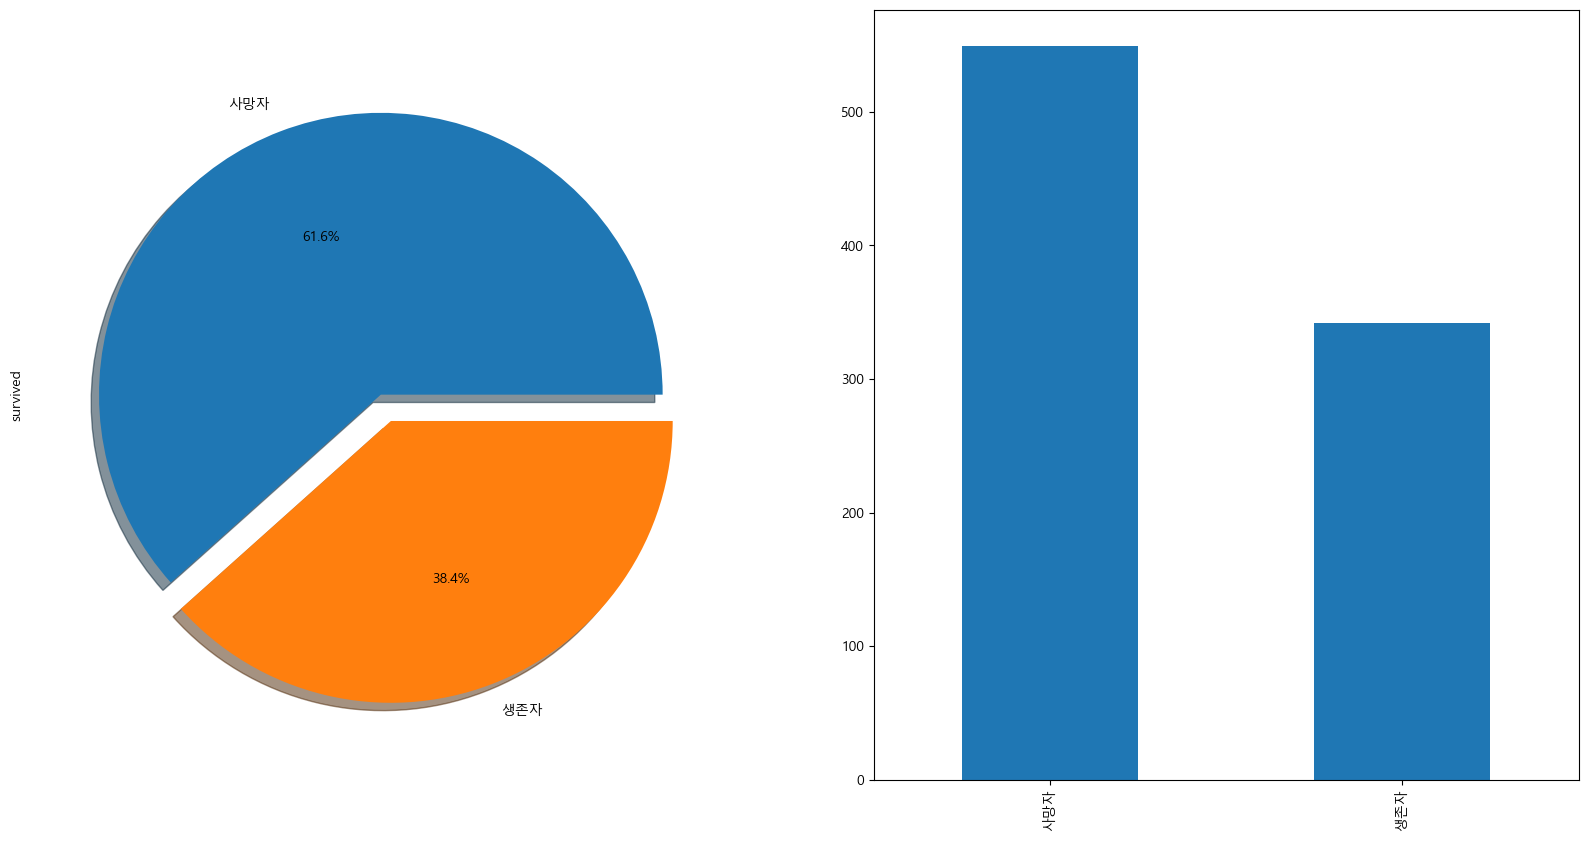

In [9]:
# 데이터 모델링과 시각화
# 0. 전체 생존률
# 1. 성별과 생존률
# 2. 나이와 생존률
# 3. 좌석등급과 생존률
# 4. 가족 유무와 생존률

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

# 0. 전체 생존률

# 필요한 데이터만 추출/분리
s_survived = df_result['survived'].value_counts()

# 인덱스 수정
s_survived.index = ['사망자', '생존자']
s_survived

# 시각화
# 기존방식
# fig = plt.figure(figsize=(20,10))
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)

# s_survived.plot(kind='pie', ax=ax1, autopct='%.1f%%')

# plt.show()

# 모던한 방식
fig, ax = plt.subplots(1,2, figsize=(20,10))

s_survived.plot.pie(autopct='%.1f%%', ax=ax[0], explode=[0, 0.1], shadow=True)
s_survived.plot.bar(ax=ax[1])

plt.show()


<Axes: xlabel='생존 여부', ylabel='survived'>

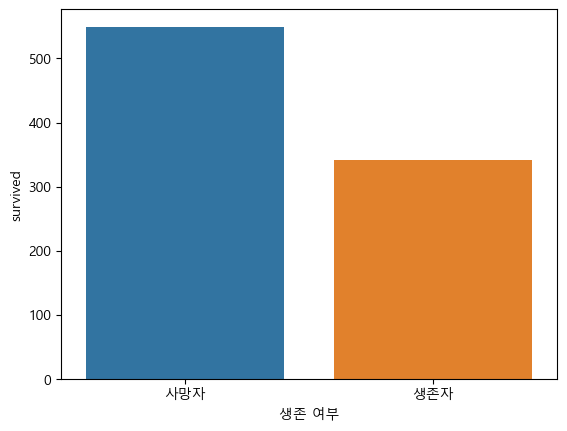

In [10]:
df_survived = pd.DataFrame(s_survived)

df_survived

df_survived = df_survived.reset_index().rename(columns={'index' : '생존 여부'})
df_survived
sns.barplot(data=df_survived, x='생존 여부', y='survived')

<Axes: xlabel='survived_kor', ylabel='count'>

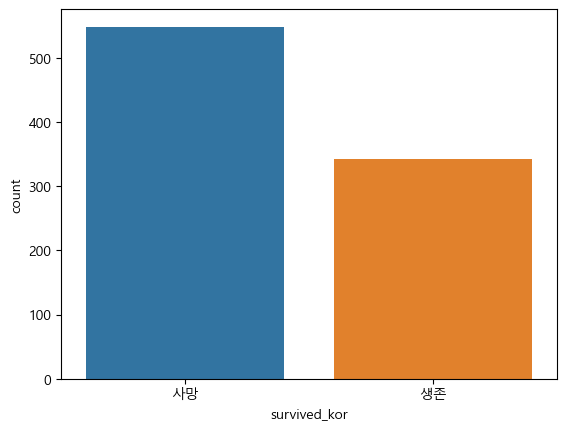

In [11]:
# countplot() 을 활용하면 카운트를 우리가 세지 않아도 시각화 가능하다.

df_result

sns.countplot(df_result, x='survived')

df_result

# 만약 0 / 1 이 아닌 사망 / 생존으로 표현하고 싶다면 데이터프레임의 값을 수정해야함
# 새로운 컬럼을 만들어서 사망/생존을 저장하자.

df_result['survived_kor'] = df_result['survived'].map({0:'사망', 1:'생존'})

df_result
sns.countplot(df_result, x='survived_kor')


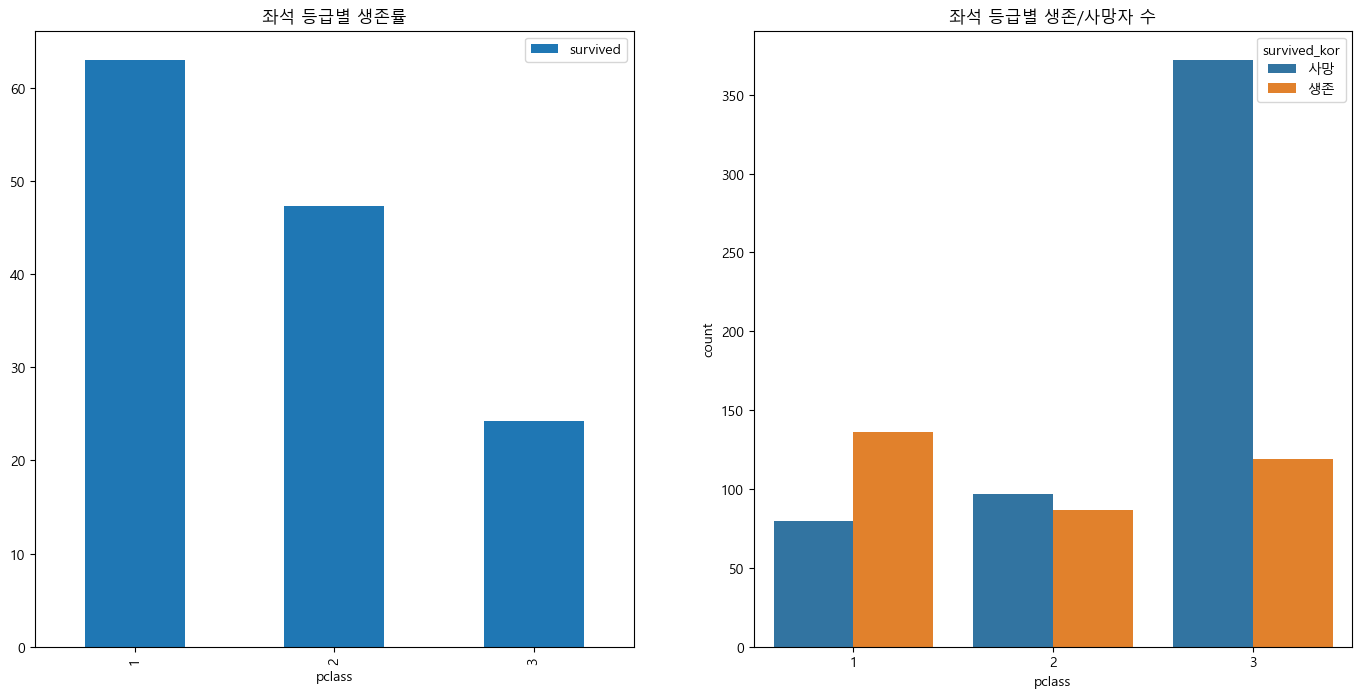

In [12]:
# 좌석 등급에 따른 생존률 시각화

# 좌석 등급은 총 3가지가 있다. (1, 2, 3)
df_result['pclass'].unique()

fig, ax = plt.subplots(1,2, figsize=(17,8))

# pclass와 survived칼럼만 가지는 데이터프레임 생성
df_pclass = df_result[['pclass', 'survived']]
df_pclass

# groupby() : 특정 칼럼을 기준으로 그룹화를 시킨다.
# groupby() 다음에는 하나의 값을 구해주는 집계 함수를 사용해야한다.
df_pclass.groupby('pclass').count()
df_pclass.groupby('pclass').sum()

# 사망 : 0, 생존 : 1 이므로 평균을 구하게되면 생존률이 나온다.
df_pclass.groupby('pclass').mean()

df_pclass.groupby('pclass').mean() * 100

(df_pclass.groupby('pclass').mean() * 100).plot.bar(ax=ax[0])


# 좌석 등급별 생존자/사망자 카운트를 시각화 한다.
sns.countplot(data=df_result, x='pclass', hue='survived_kor', ax=ax[1])

ax[0].set_title('좌석 등급별 생존률')
ax[1].set_title('좌석 등급별 생존/사망자 수')

plt.show()


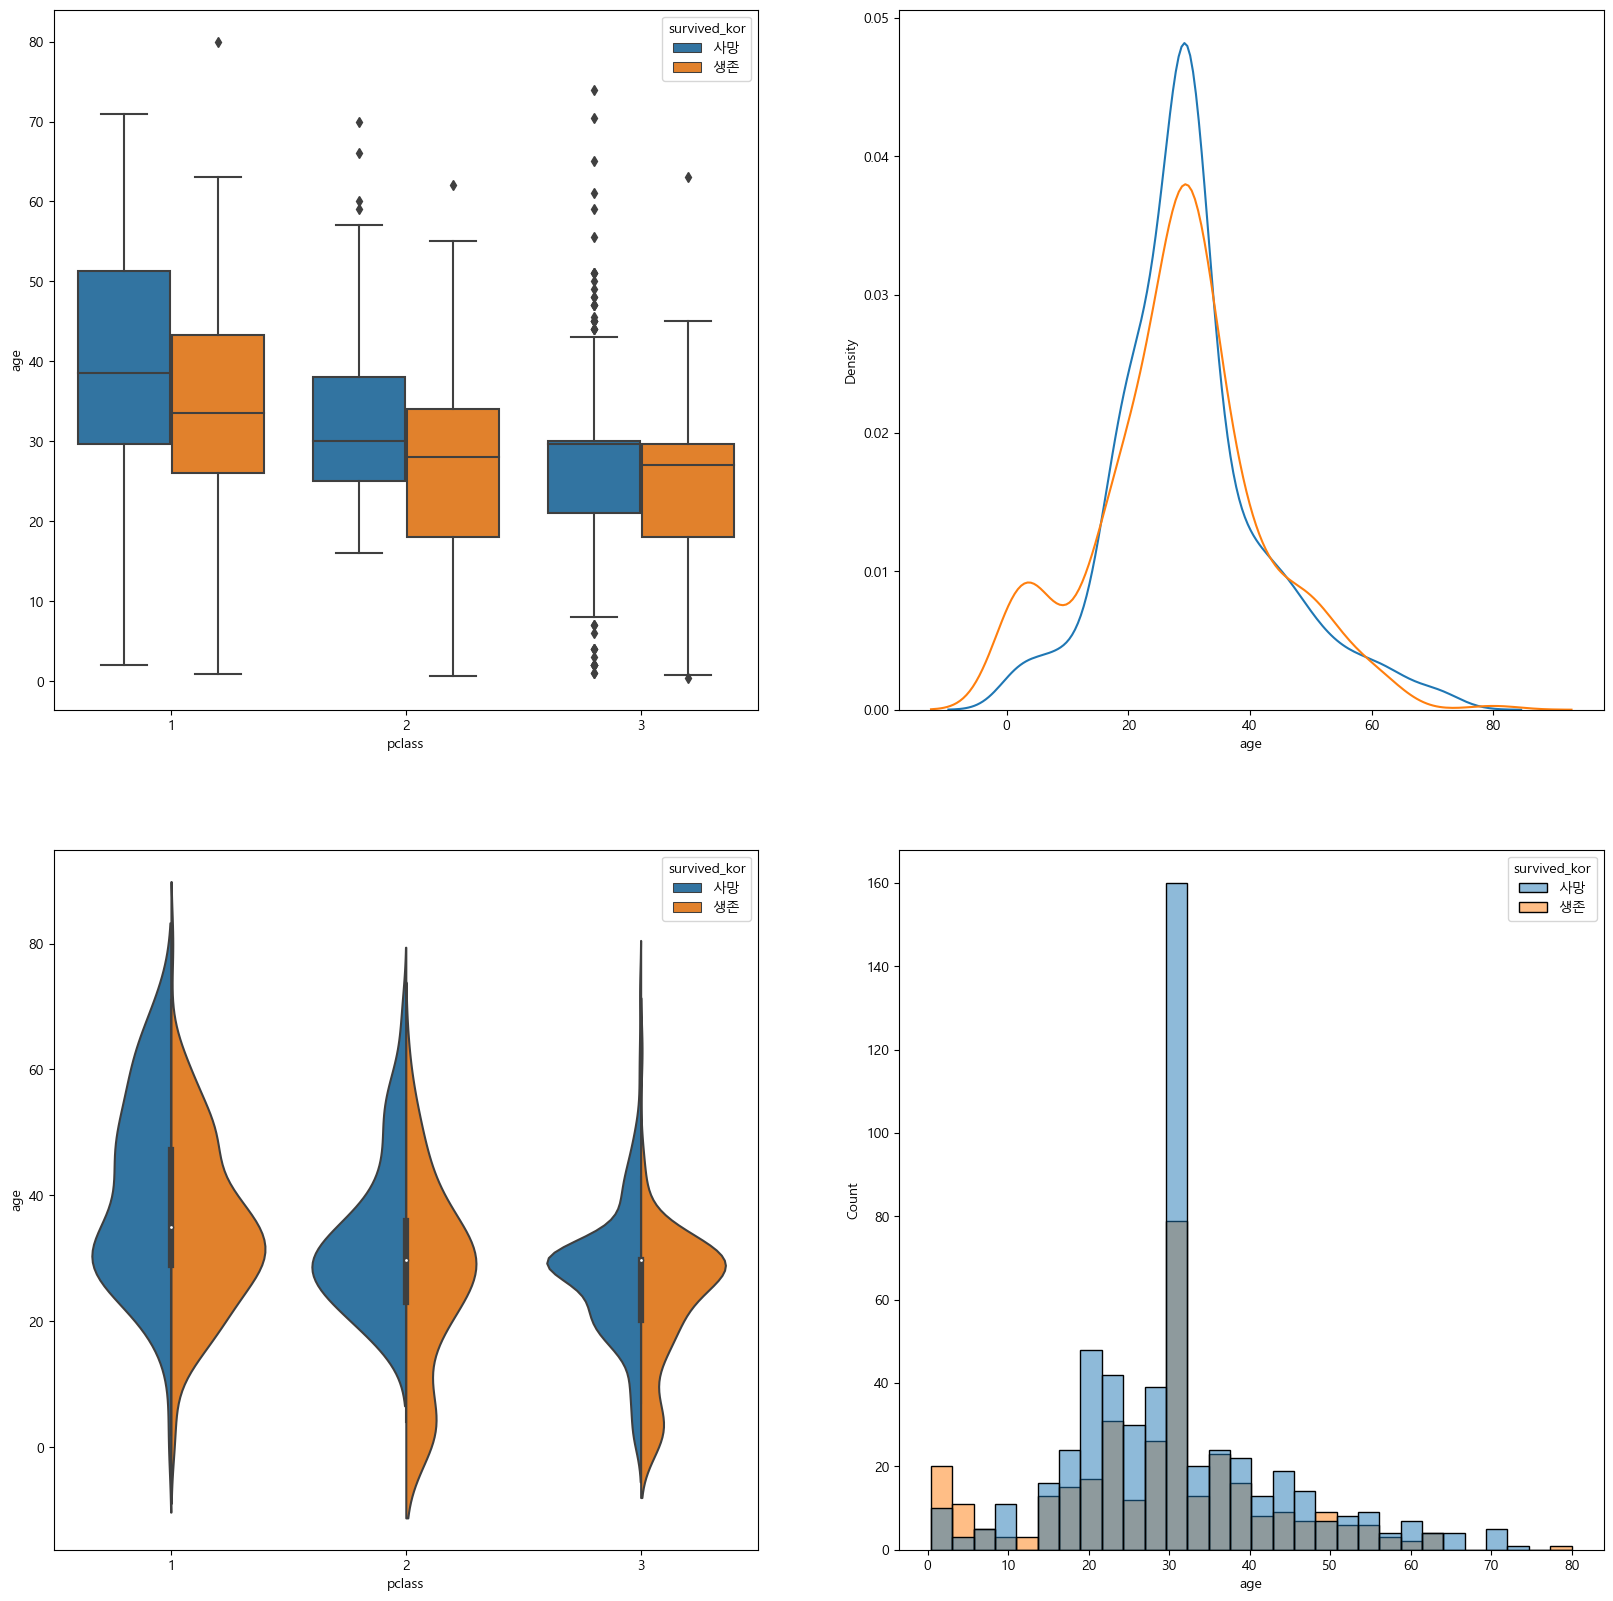

In [24]:
# 나이별 생존률

# 객실 등급이나 성별은 특정 카테고리로 분류할 수 있는 범주형 데이터이다.
# 나이는 연속적인 값을 가지는 수치형 데이터이다.

# 데이터의 종류
# 1. 수치형 데이터
# a) 연속형
#    연속적으로 나타나고 소수점이 의미있는 데이터(키, 몸무게 등)
# b) 이산형
#    수치로는 사용되지만 소수점이 의미없는 데이터 (판매 상품 수량, 학생 수 등)

# 2. 범주형 데이터
# a) 명목형
#    카테고리로 분류되는 값 (성별, 혈액형)
# b) 순위형
#    카테고리에 순서가 있는 값 (만족도, 등급 등)


fig, ax = plt.subplots(2,2, figsize=(20,20))

# 1. 박스 플롯
# 데이터의 전체적인 분포를 보기 좋은 차트
# sns.boxplot(data=df_result, x='survived_kor', y='age', ax=ax[0,0])

sns.boxplot(data=df_result, x='pclass', y='age', hue='survived_kor', ax=ax[0,0])

# 2. KDE (Kernel Density Estimation) // 곡선(커널) 밀도 추정
# 수치형 데이터의 분포를 곡선으로 확인할 수 있다.
# sns.kdeplot(data=df_result, x='age', ax=ax[0,1])

s_dead = df_result['survived'] == 0
s_dead

s_alive = df_result['survived'] == 1
s_alive

df_result[s_dead]
df_result[s_alive]

# 사망자의 나이대 분포
sns.kdeplot(data=df_result[s_dead], x='age', ax=ax[0,1])

# 생존자의 나이대 분포
sns.kdeplot(data=df_result[s_alive], x='age', ax=ax[0,1])

# 3. 바이올린 플롯
# 박스 플롯의 사분위와 kde 플롯의 분포도를 동시에 확인할 수 있는 차트
# split=True 를 사용하면 하나의 바이올린에 2개의 그룹을 같이 표시하여 비교하기 좋게 만든다.
sns.violinplot(data=df_result, x='pclass', y='age', hue='survived_kor', ax=ax[1,0], split=True)

# 4. 히스토그램
# kde처럼 데이터에 대한 분포량을 확인할 수 있다.
sns.histplot(data = df_result, x='age', hue='survived_kor', ax=ax[1,1])

plt.show()


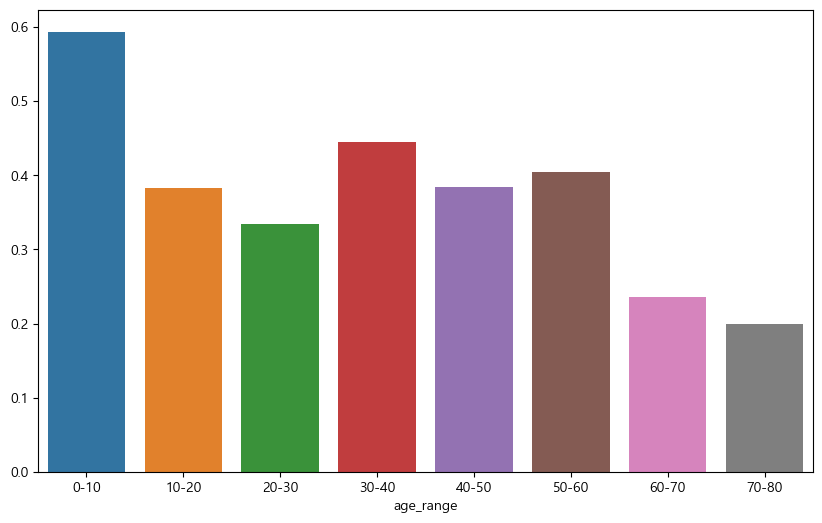

In [32]:
# 나이를 범주형 데이터로 변환하여 시각화

# 연령대 범주 생성
tmp = [0, 10, 20, 30, 40, 50, 60, 70, 80] # 연령대를 나누는 기준

# 연령대의 라벨
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

df_result['age_range'] = pd.cut(df_result['age'], tmp, labels=labels)

df_result


# 연령대 별 생존률 계산
age_survival_rate =df_result.groupby('age_range')['survived'].mean()

age_survival_rate

# 바그래프
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.barplot(x=age_survival_rate.index, y=age_survival_rate.values, ax=ax)

plt.show()


In [41]:
# 전체 칼럼들과 생존유무의 상관관계를 확인해보자.

# DataFrame의 corr()을 활용하면 상관관계를 확인할 수 있다.
# corr()는 수치형 데이터만 분석이 가능하다.(문자열 안된다.)

df_corr = df_result.loc[:,'survived':'embarked']

# 성별을 0과 1로 직접 수정
df_corr['sex'] = df_corr['sex'].map({'male':0, 'female':1})

# 성별은 우리가 더미변수로 만들어 0/1로 표현하도록 직접 수정하였다.
# 탑승 항구는 판다스의 기능을 이용해보자.
# get_dummies()
df_corr = pd.get_dummies(df_corr, columns=['embarked'])

# 더미 변수(칼럼)란?
# 카테고리/범주형 데이터를 컴퓨터가 이해하기 쉽도록 수치화 시킨 칼럼
df_corr

# corr() : 칼럼간의 상관계수를 계산해주는 메소드
df_corr.corr()

# 상관계수란?
# 상관관계를 나타내는 지표

# 상관관계란?
# 두 변수간 얼마나 관련되었는가를 의미한다.
# 단순히 A칼럼이 증가하면 B칼럼도 증가하는가? 아니면 감소하는가? 의 관계를 표현함
# ** 주의 : 상관관계는 인과관계를 의미하는게 아님! **

# 인과관계(원인과 결과의 관계)
# 날씨가 덥다 -> 아이스크림이 잘 팔린다.
# 날씨가 덥다 -> 바닷가에 많이 놀러간다.

# 상관관계는 원인이아니라 단순히 같이 증가하거나 감소하는 관계
# 아이스크림이 잘 팔린다. -> 바닷가에 많이 놀러간다.

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683
pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053
sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.082853,0.074115,-0.119224
age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.032024,-0.013855,-0.019336
sibsp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734
parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814
fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184
embarked_C,0.168240,-0.243292,0.082853,0.032024,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742
embarked_Q,0.003650,0.221009,0.074115,-0.013855,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421
embarked_S,-0.149683,0.074053,-0.119224,-0.019336,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\Administrator\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


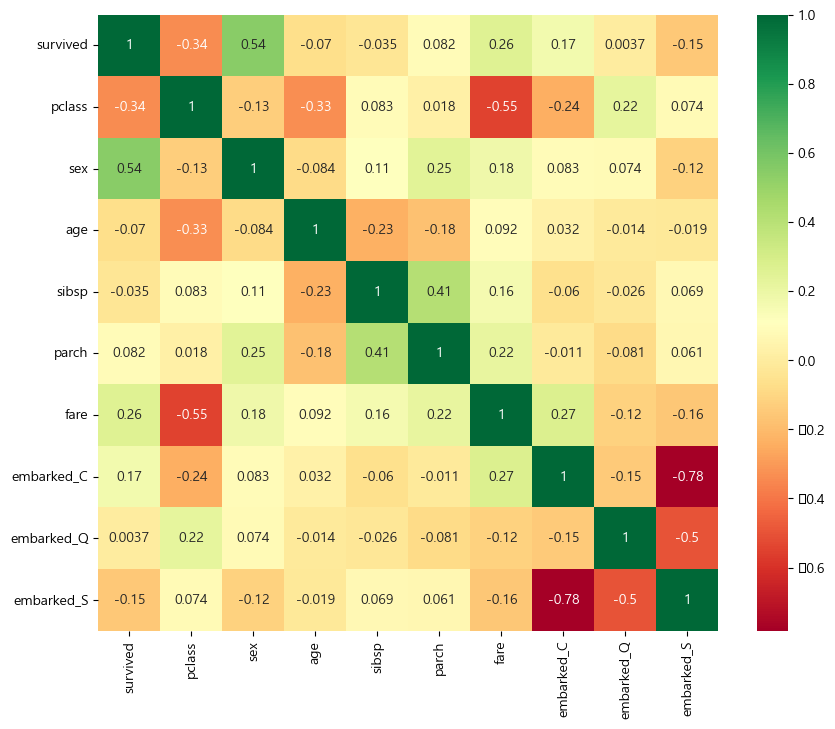

In [44]:
# 상관관계 시각화
fig, ax = plt.subplots(1,1, figsize=(10,8))

sns.heatmap(data=df_corr.corr(), ax=ax, annot=True, cmap='RdYlGn')

plt.show()

